# Objectives: 

This is Scikit-learn Part 3. You will ... 

1. load the handwritten digits image dataset from Scikit-learn. 

2. explore your data with the help of matplotlib and Principal Component Analysis (PCA),

3. split your data into training and test sets.

5. construct an supervised model (Support Vector Machines (SVM)), fit this model to the data, predict values, and validate the model that you have built.



# Loading handwritten digits image dataset 

In [1]:
# Import `datasets` from `sklearn`
from sklearn import datasets
import numpy as np

# Load in the `digits` data
digits = datasets.load_digits()

In [2]:
type(digits)

sklearn.utils.Bunch

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

# Explore the Data

In [4]:
# Print out the description of the `digits` data
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# Print out the data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
# Print out the data
print(type(digits.data))

<class 'numpy.ndarray'>


In [7]:
# Print out the data
print(digits.data.shape)

(1797, 64)


In [8]:
# Print out the target values
print(digits.target)

[0 1 2 ... 8 9 8]


In [9]:
# Inspect the shape
print(digits.target.shape)

(1797,)


Because you have 1797 samples, you also have 1797 target values.

In [10]:
# Print the number of unique labels
number_digits = len(np.unique(digits.target))

print(number_digits)

10


These 10 unique digits are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [11]:
# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 8, 8)


The images data contains three dimensions: there are 1797 instances that are 8 by 8 pixels big. 

# Visualize Your Data Images With matplotlib

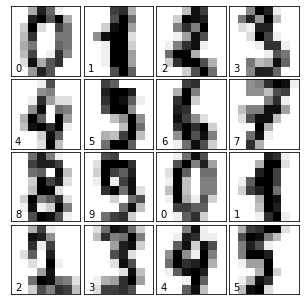

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(4, 4))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 16 images
for i in range(16):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

### Visualizing Your Data: Principal Component Analysis (PCA)

#### Why do we need to use PCA? 
As the digits data set contains 64 features, you’re working with a high dimensional data set. However, the effective dimensionality might be much smaller than the number of the features, such as in data sets where some features are irrelevant. In addition, data with only two or three dimensions are easier to grasp and can also be visualized easily. You’re going to visualize the data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). 

#### What's PCA? 
The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables.

In short, it’s a linear transformation method that yields the directions (principal components) that maximize the variance of the data. Remember that the variance indicates how far a set of data points lie apart. 

You can easily apply PCA do your data with the help of scikit-learn:

In [13]:
# import library 
from sklearn.decomposition import PCA

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)


In [14]:
# Inspect the shape
reduced_data_pca.shape

(1797, 2)

In [15]:
# Print out the data
print(reduced_data_pca)

[[ -1.25946851  21.27488104]
 [  7.95761538 -20.76870347]
 [  6.99192097  -9.95598249]
 ...
 [ 10.80127944  -6.96024858]
 [ -4.87210213  12.42394463]
 [ -0.34439468   6.36555669]]


You can now build a scatterplot to visualize the data:

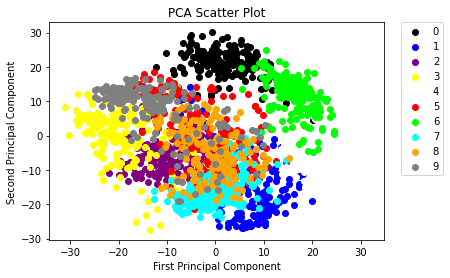

In [16]:
# You put your colors together in a list. 
# Note that you list ten colors, which is equal to the number of labels that you have. 
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

# You set up your x and y coordinates. 
# x = the first column of reduced_data_pca,
# y = the second column of reduced_data_pca,
for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

# Splitting Your Data Into Training And Test Sets

Divide the data set into two parts: a training set and a test set. The first is used to train the system, while the second is used to evaluate the learned or trained system.
    
In practice, the division of your data set into a test and a training sets are disjoint: the most common splitting choice is to take 2/3 of your original data set as the training set, while the 1/3 that remains will compose the test set.    


In [17]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)


In [18]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)


1347
64


In [19]:
# Number of Training labels
n_digits = len(np.unique(y_train))
print(n_digits)

# Inspect `y_train`
print(len(y_train))

10
1347


You’ll see that the training set X_train now contains 1347 samples, which is precisely 2/3d of the samples that the original data set contained, and 64 features, which hasn’t changed. The y_train training set also contains 2/3d of the labels of the original data set. This means that the test sets X_test and y_test contains 450 samples.

# Apply Support Vector Machine (SVM) algorithm

In [20]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001, kernel='linear')

In [21]:
# Predict the label of `X_test`
predicted = svc_model.predict(X_test)

# Print first 10 values of `predicted` and `y_test` to check the results
print(predicted[:10])
print(y_test[:10])

[6 9 3 7 2 1 5 2 5 2]
[6 9 3 7 2 1 5 2 5 2]


In [22]:
predicted.shape, y_test.shape

((450,), (450,))

# Evaluation of Your SVM Model

In [23]:
# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

# Summary: 

You have learned:  

1. how to load an image dataset from Scikit-learn. 

2. how to explore your image data with the help of matplotlib and Principal Component Analysis (PCA),

3. how to split your data into training and test sets.

5. how to construct an supervised model (Support Vector Machines (SVM)), fit this model to the data, predict values, and validate the model that you have built.

# Next: steps for investigating data